## North American Infection and Mortality Rates for COVID-19

In [1]:
# dependencies

import requests
import json
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import scipy.stats as st

import gmaps
#from config import gkey
import matplotlib.pyplot as plt

In [2]:
url = "https://covid-api.mmediagroup.fr/v1/cases?"

In [3]:
print(requests.get(url))

<Response [200]>


In [4]:
continent = "North America"
query_url = url + "continent=" + continent

data_response = requests.get(query_url)
data_json = data_response.json()
data_json

{'Antigua and Barbuda': {'All': {'confirmed': 1232,
   'recovered': 1014,
   'deaths': 32,
   'country': 'Antigua and Barbuda',
   'population': 102012,
   'sq_km_area': 442,
   'life_expectancy': '70.5',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'AG',
   'location': 'Caribbean',
   'iso': 28,
   'capital_city': "Saint John's",
   'lat': '17.0608',
   'long': '-61.7964',
   'updated': '2021/05/04 23:20:50+00'}},
 'Bahamas': {'All': {'confirmed': 10576,
   'recovered': 9579,
   'deaths': 210,
   'country': 'Bahamas',
   'population': 395361,
   'sq_km_area': 13878,
   'life_expectancy': '71.1',
   'elevation_in_meters': None,
   'continent': 'North America',
   'abbreviation': 'BS',
   'location': 'Caribbean',
   'iso': 44,
   'capital_city': 'Nassau',
   'lat': '25.025885',
   'long': '-78.035889',
   'updated': '2021/05/04 23:20:50+00'}},
 'Barbados': {'All': {'confirmed': 3881,
   'recovered': 3804,
   'deaths': 44,
   'country': 'Barbados',


In [5]:
import json

All = []

target_url = query_url 
response = requests.get(query_url).json()
    
for key,value in response.items():
    All.append(value['All'])
    
pulled_df = pd.DataFrame(All)
pulled_df.head()

,confirmed,recovered,deaths,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,lat,long,updated
0,1232,1014,32,Antigua and Barbuda,102012,442,70.5,None,North America,AG,Caribbean,28,Saint John's,17.0608,-61.7964,2021/05/04 23:20:50+00
1,10576,9579,210,Bahamas,395361,13878,71.1,None,North America,BS,Caribbean,44,Nassau,25.025885,-78.035889,2021/05/04 23:20:50+00
2,3881,3804,44,Barbados,285719,430,73,None,North America,BB,Caribbean,52,Bridgetown,13.1939,-59.5432,2021/05/04 23:20:50+00
3,12674,12239,323,Belize,374681,22696,70.9,173,North America,BZ,Central America,84,Belmopan,17.1899,-88.4976,2021/05/04 23:20:50+00
4,1257740,1154712,24399,Canada,36624199,9970610,79.4,487,North America,CA,North America,124,Ottawa,NaN,NaN,NaN


In [6]:
# save as csv to limit API requests
pulled_df.to_csv('NAcovid.csv',index = False)

# open and read 
df = pd.read_csv('NAcovid.csv')
df.head()

,confirmed,recovered,deaths,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,lat,long,updated
0,1232,1014,32,Antigua and Barbuda,102012,442,70.5,NaN,North America,AG,Caribbean,28,Saint John's,17.060800,-61.796400,2021/05/04 23:20:50+00
1,10576,9579,210,Bahamas,395361,13878,71.1,NaN,North America,BS,Caribbean,44,Nassau,25.025885,-78.035889,2021/05/04 23:20:50+00
2,3881,3804,44,Barbados,285719,430,73.0,NaN,North America,BB,Caribbean,52,Bridgetown,13.193900,-59.543200,2021/05/04 23:20:50+00
3,12674,12239,323,Belize,374681,22696,70.9,173,North America,BZ,Central America,84,Belmopan,17.189900,-88.497600,2021/05/04 23:20:50+00
4,1257740,1154712,24399,Canada,36624199,9970610,79.4,487,North America,CA,North America,124,Ottawa,NaN,NaN,NaN


#### Data Cleanup
1. drop unneeded columns 
2. look for blank or NA values 
3. groupby by Country 
4. check to see that datatypes match desired analyses
  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   confirmed            23 non-null     int64  
 1   recovered            23 non-null     int64  
 2   deaths               23 non-null     int64  
 3   country              23 non-null     object 
 4   population           23 non-null     int64  
 5   sq_km_area           23 non-null     int64  
 6   life_expectancy      23 non-null     float64
 7   elevation_in_meters  15 non-null     object 
 8   continent            23 non-null     object 
 9   abbreviation         23 non-null     object 
 10  location             23 non-null     object 
 11  iso                  23 non-null     int64  
 12  capital_city         23 non-null     object 
 13  lat                  21 non-null     float64
 14  long                 21 non-null     float64
 15  updated              20 non-null     objec

In [8]:
# new dataframe with kept columns 
columns_to_keep = [
    'country',
    'confirmed',
    'deaths',
    'population',
    'sq_km_area',
    'life_expectancy',
    'location'

    ]
new_df = df[columns_to_keep]
new_df

,country,confirmed,deaths,population,sq_km_area,life_expectancy,location
0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean
1,Bahamas,10576,210,395361,13878,71.1,Caribbean
2,Barbados,3881,44,285719,430,73.0,Caribbean
3,Belize,12674,323,374681,22696,70.9,Central America
4,Canada,1257740,24399,36624199,9970610,79.4,North America
5,Costa Rica,257980,3310,4905769,51100,75.8,Central America
6,Cuba,110644,686,11484636,110861,76.2,Caribbean
7,Dominica,174,0,73925,751,73.4,Caribbean
8,Dominican Republic,268070,3504,10766998,48511,73.2,Caribbean
9,El Salvador,69727,2137,6377853,21041,69.7,Central America


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          23 non-null     object 
 1   confirmed        23 non-null     int64  
 2   deaths           23 non-null     int64  
 3   population       23 non-null     int64  
 4   sq_km_area       23 non-null     int64  
 5   life_expectancy  23 non-null     float64
 6   location         23 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.4+ KB


In [10]:
clean_df = new_df.copy()

In [11]:
clean_df.dtypes

country             object
confirmed            int64
deaths               int64
population           int64
sq_km_area           int64
life_expectancy    float64
location            object
dtype: object

In [12]:
clean_df['Population Density'] = new_df['population'] / new_df['sq_km_area']
clean_df

,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density
0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380
1,Bahamas,10576,210,395361,13878,71.1,Caribbean,28.488327
2,Barbados,3881,44,285719,430,73.0,Caribbean,664.462791
3,Belize,12674,323,374681,22696,70.9,Central America,16.508680
4,Canada,1257740,24399,36624199,9970610,79.4,North America,3.673215
5,Costa Rica,257980,3310,4905769,51100,75.8,Central America,96.003307
6,Cuba,110644,686,11484636,110861,76.2,Caribbean,103.594916
7,Dominica,174,0,73925,751,73.4,Caribbean,98.435419
8,Dominican Republic,268070,3504,10766998,48511,73.2,Caribbean,221.949620
9,El Salvador,69727,2137,6377853,21041,69.7,Central America,303.115489


In [13]:
clean_df['Confirmed Per Capita'] = new_df['confirmed'] / new_df['population']
clean_df['Deaths Per Capita'] = new_df['deaths'] / new_df['population']
clean_df['Mortality Rate'] = new_df['deaths'] / new_df['confirmed']
clean_df['life_expectancy'] = clean_df['life_expectancy'].apply(float)
clean_df
                                                               

,country,confirmed,deaths,population,sq_km_area,life_expectancy,location,Population Density,Confirmed Per Capita,Deaths Per Capita,Mortality Rate
0,Antigua and Barbuda,1232,32,102012,442,70.5,Caribbean,230.796380,0.012077,0.000314,0.025974
1,Bahamas,10576,210,395361,13878,71.1,Caribbean,28.488327,0.026750,0.000531,0.019856
2,Barbados,3881,44,285719,430,73.0,Caribbean,664.462791,0.013583,0.000154,0.011337
3,Belize,12674,323,374681,22696,70.9,Central America,16.508680,0.033826,0.000862,0.025485
4,Canada,1257740,24399,36624199,9970610,79.4,North America,3.673215,0.034342,0.000666,0.019399
5,Costa Rica,257980,3310,4905769,51100,75.8,Central America,96.003307,0.052587,0.000675,0.012830
6,Cuba,110644,686,11484636,110861,76.2,Caribbean,103.594916,0.009634,0.000060,0.006200
7,Dominica,174,0,73925,751,73.4,Caribbean,98.435419,0.002354,0.000000,0.000000
8,Dominican Republic,268070,3504,10766998,48511,73.2,Caribbean,221.949620,0.024897,0.000325,0.013071
9,El Salvador,69727,2137,6377853,21041,69.7,Central America,303.115489,0.010933,0.000335,0.030648


#### Data Visualizations

* bar chart by country of infection and mortality rates 
* population vs confirmed cases
* population density vs confirmed cases
* population vs deaths
* filter by location/region/country 
* death rate per capita v life expectancy
* create gmaps heat map for mortality rate
* create gmaps 

#### Continental Data and Visualizations

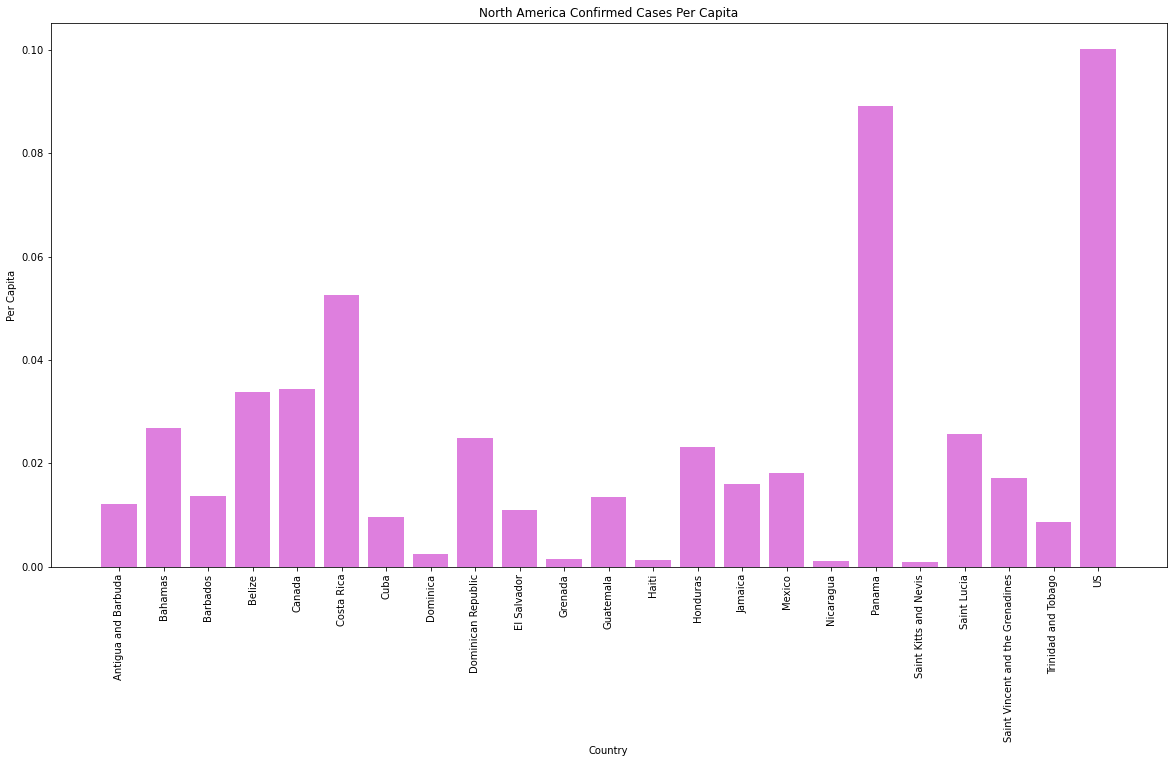

In [14]:
# Confirmed per Capita by Country
x_axis = clean_df['country']
y_axis = clean_df['Confirmed Per Capita']

plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90, fontsize = 10)
plt.title('North America Confirmed Cases Per Capita')
plt.ylabel('Per Capita')
plt.xlabel('Country')

plt.savefig("Images/NAConfirmedCases.png")
plt.show()

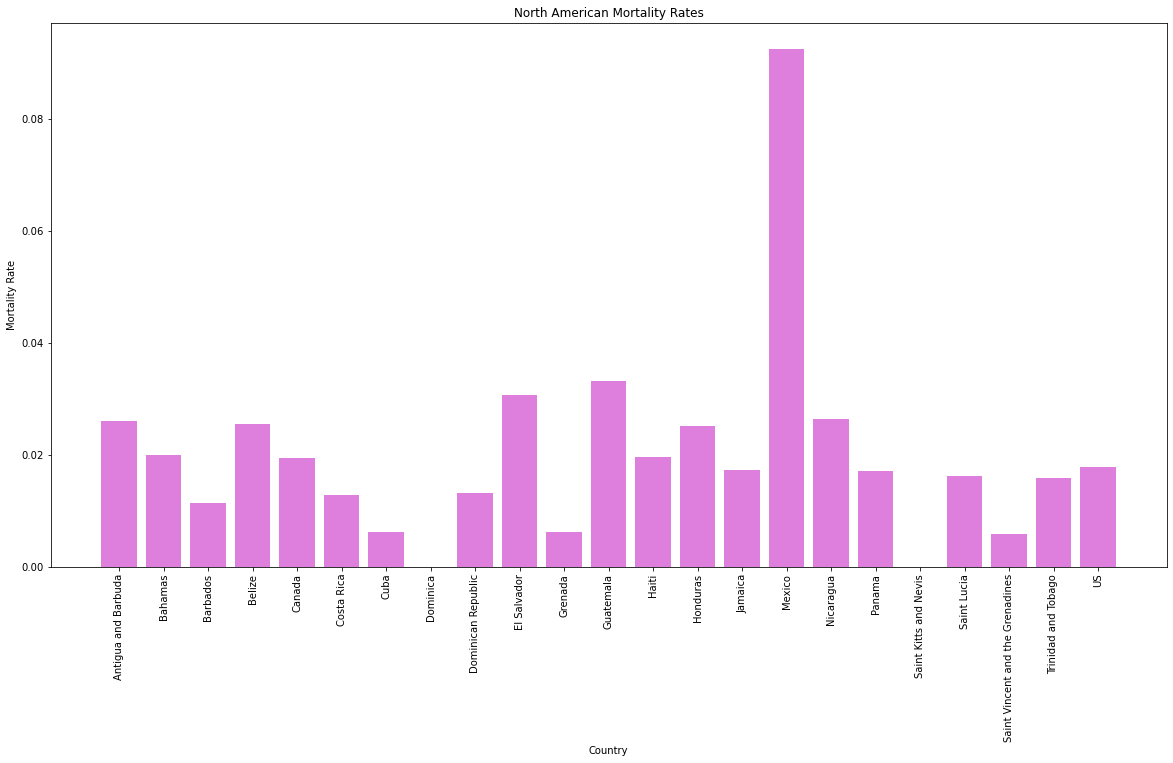

In [15]:
# Mortality Rates by Country
x_axis = clean_df['country']
y_axis = clean_df['Mortality Rate']
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='m', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90, fontsize = 10)
plt.title('North American Mortality Rates')
plt.ylabel('Mortality Rate')
plt.xlabel('Country')

plt.savefig("Images/NAMortalityRates.png")
plt.show()

The r-squared is: 0.007129425452499356


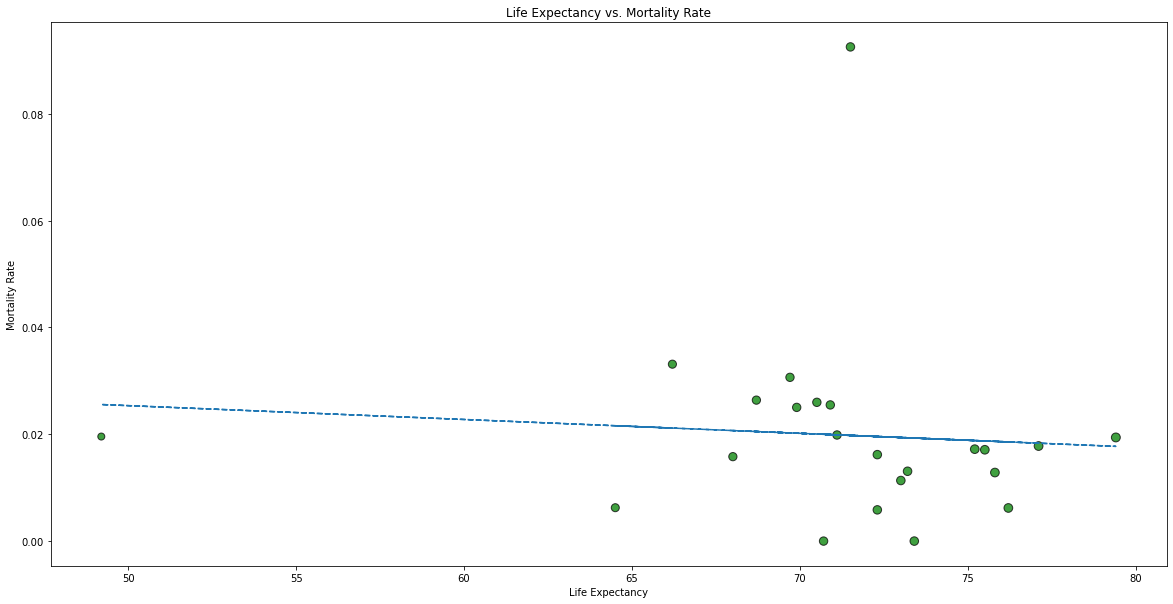

In [16]:
# Scatter Plot of Life Expectancy and Mortality Rate
x_axis = clean_df['life_expectancy']
y_axis = clean_df['Mortality Rate']

plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Mortality Rate')
plt.xlabel('Life Expectancy')
plt.title('Life Expectancy vs. Mortality Rate')
print(f"The r-squared is: {r**2}")

plt.savefig("Images/LifeExpectancyVMortality.png")
plt.show()

The r-squared is: 0.17394399812965566


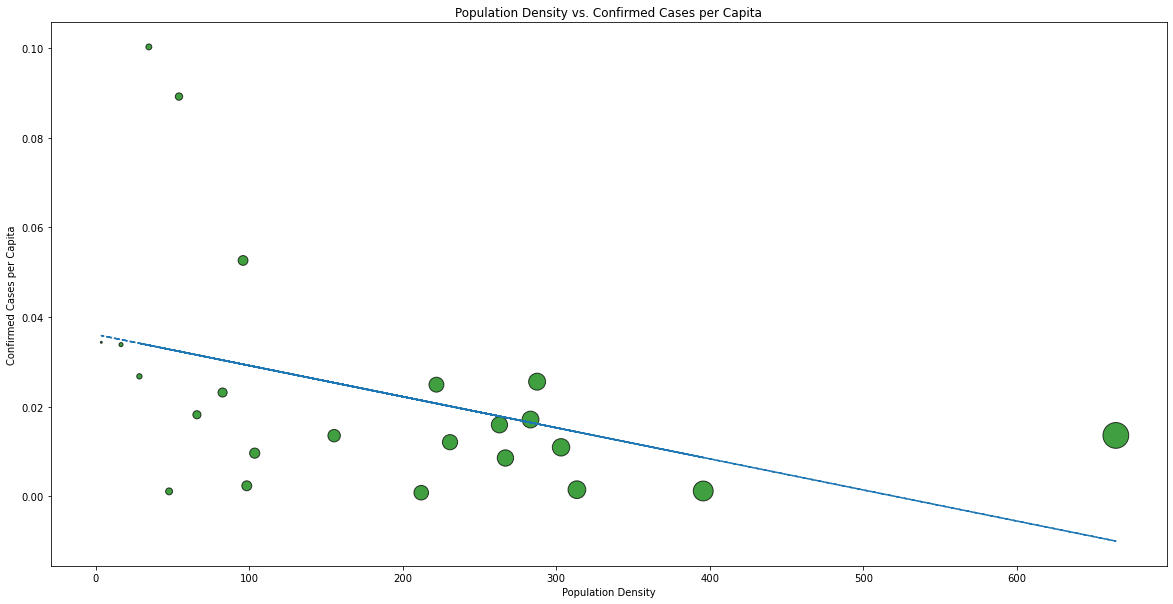

In [17]:
# Scatter Plot of Population Density and Confirmed Per Capita
x_axis = clean_df['Population Density']
y_axis = clean_df['Confirmed Per Capita']
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Confirmed Cases per Capita')
plt.xlabel('Population Density')
plt.title('Population Density vs. Confirmed Cases per Capita')
print(f"The r-squared is: {r**2}")

plt.savefig("Images/PopDensityVCases.png")
plt.show()

The r-squared is: 0.055007487705755864


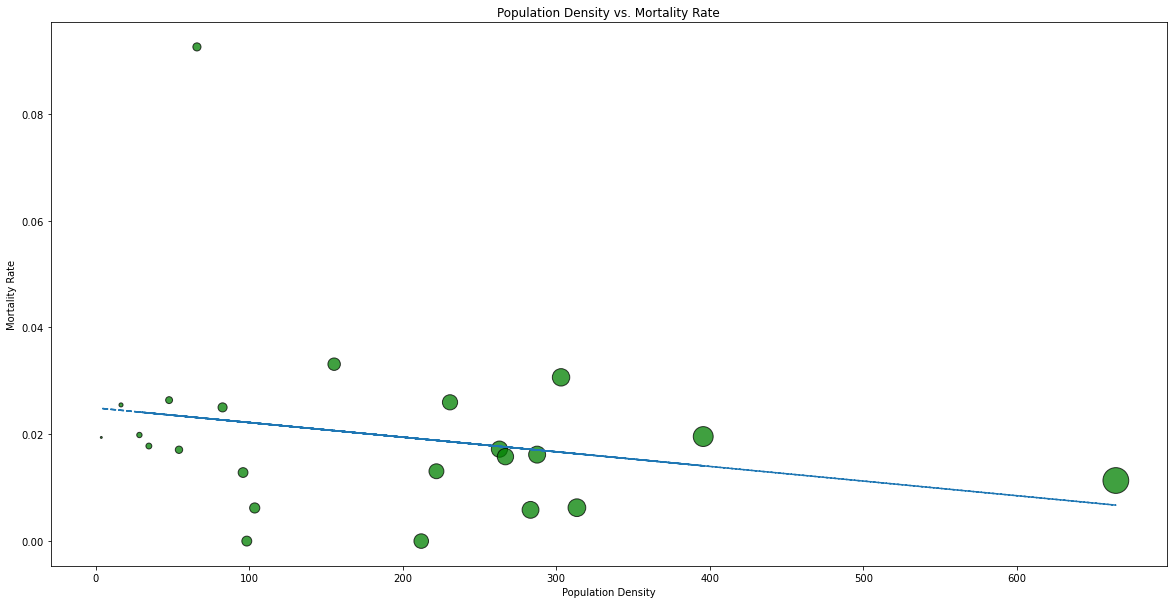

In [18]:
# Scatter Plot of Population Density and Mortality Rate
x_axis = clean_df['Population Density']
y_axis = clean_df['Mortality Rate']
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
plt.plot(x_axis,fit,"--")

plt.ylabel('Mortality Rate')
plt.xlabel('Population Density')
plt.title('Population Density vs. Mortality Rate')
print(f"The r-squared is: {r**2}")

plt.savefig("Images/PopDensityVMortality.png")
plt.show()

In [19]:
# Using GroupBy in order to separate the data into fields according to "location" values
grouped_df = new_df.groupby(['location'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
clean_group_df = grouped_df.sum()
clean_group_df

,confirmed,deaths,population,sq_km_area,life_expectancy
location,,,,,
Caribbean,472165,5797,38801215,220358,909.6
Central America,3505824,242486,177316317,2479532,568.2
North America,33768162,602802,361083662,19334130,156.5


In [20]:
clean_grouped_df = clean_group_df.drop(['life_expectancy'],axis=1)
clean_grouped_df

,confirmed,deaths,population,sq_km_area
location,,,,
Caribbean,472165,5797,38801215,220358
Central America,3505824,242486,177316317,2479532
North America,33768162,602802,361083662,19334130


In [21]:
clean_grouped_df['Population Density'] = clean_grouped_df['population'] / clean_grouped_df['sq_km_area']
clean_grouped_df['Confirmed per Capita'] = clean_grouped_df['confirmed'] / clean_grouped_df['population']
clean_grouped_df['Deaths per Capita'] = clean_grouped_df['deaths'] / clean_grouped_df['population']

clean_grouped_df

,confirmed,deaths,population,sq_km_area,Population Density,Confirmed per Capita,Deaths per Capita
location,,,,,,,
Caribbean,472165,5797,38801215,220358,176.082625,0.012169,0.000149
Central America,3505824,242486,177316317,2479532,71.512010,0.019772,0.001368
North America,33768162,602802,361083662,19334130,18.675972,0.093519,0.001669


In [23]:
# g = sns.pairplot(clean_df, corner=True)  
# g.map_lower()

# plt.savefig("Images/seaborn.png")
# plt.show()